In this analysis, we will use Machine learning techniques to build models that predict diabetes rates based on the features we previously selected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe. Missing values and outliers have been dealt with in this dataframe. 
df = pd.read_csv('data_atlas/counties_features_cleaned.csv')

In [2]:
df.shape

(3143, 36)

In [3]:
df.head()

,Unnamed: 0,FIPS,State,County,PCT_DIABETES_ADULTS13,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,...,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,PERPOV10,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10,PCT_OBESE_ADULTS13
0,0,1001,AL,Autauga,13.0,0.628059,56580.0,5.582238,0.073889,0.036945,...,12.315055,18.824675,32.006749,0,0.018472,4.509008,0.674004,12.7,3.284786,34.1
1,1,1003,AL,Baldwin,10.4,1.125938,52387.0,3.403433,0.100331,0.117053,...,12.315055,18.824675,33.216055,0,0.033444,4.509008,0.725055,12.9,2.147827,27.4
2,2,1005,AL,Barbour,15.5,0.433887,32620.0,0.478663,0.036157,0.072314,...,12.315055,18.824675,68.245839,1,0.000000,4.509008,1.280590,28.0,4.135869,38.0
3,3,1007,AL,Bibb,14.8,0.261540,40767.0,0.883314,0.043590,0.000000,...,12.315055,18.824675,50.278552,0,0.043590,4.509008,0.719122,22.2,3.458580,38.0
4,4,1009,AL,Blount,14.1,0.331351,50487.0,8.567571,0.052319,0.034879,...,12.315055,18.824675,39.681098,0,0.017440,4.509008,0.657144,14.7,3.269380,34.6


In [4]:
df.isnull().values.any() # Check if missing values have been dealt with 

False

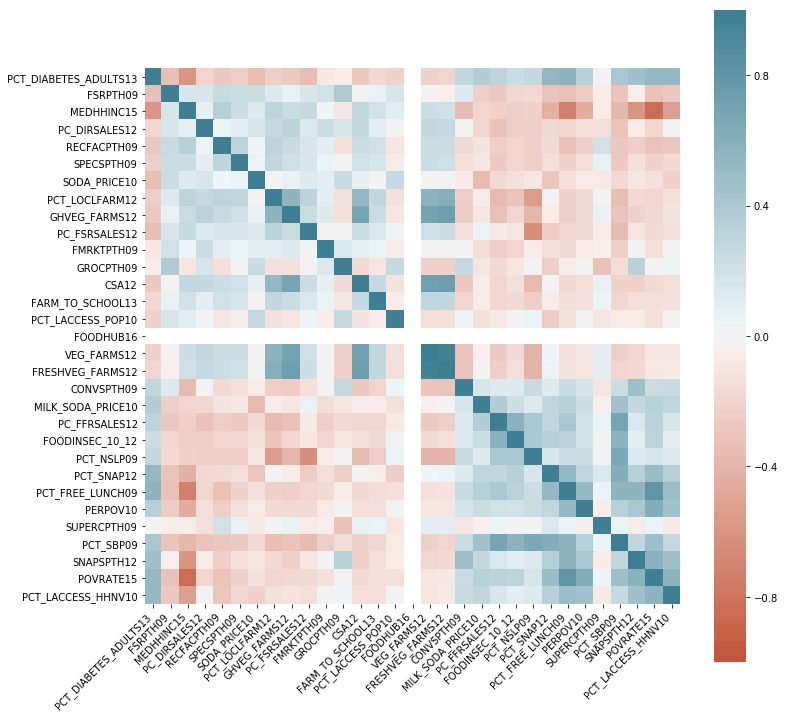

In [5]:
# Re-visit the correlation matrix
# The top row variable "PCT_DIABETES_ADULTS13" is our target variable.

corr =df.iloc[:,2:-1].corr() # Remove state, county (categorical) and obesity (because it is health data and correlated with diabites)


plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.show()

### 1. Linear Regressions using statsmodel and sklearn

#### 1) Use statsmodel: two features
#### 2) Use sklearn: all features

In [6]:
# Fit a linear regression model using statsmodel
# Use two highly correlated variables :MEDHHINC15 (Medium household income in 2015) and POVRATE15 (poverty rate in 2015)
import statsmodels.api as sm
from statsmodels.formula.api import ols

m1 = ols('PCT_DIABETES_ADULTS13~MEDHHINC15+POVRATE15',df).fit()

In [7]:
print(m1.summary())

                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.358
Model:                               OLS   Adj. R-squared:                  0.358
Method:                    Least Squares   F-statistic:                     877.2
Date:                   Thu, 09 Jan 2020   Prob (F-statistic):          2.31e-303
Time:                           21:02:20   Log-Likelihood:                -6284.8
No. Observations:                   3143   AIC:                         1.258e+04
Df Residuals:                       3140   BIC:                         1.259e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9720 

In [8]:
print("R-squared",m1.rsquared_adj)

R-squared 0.3580299338452809


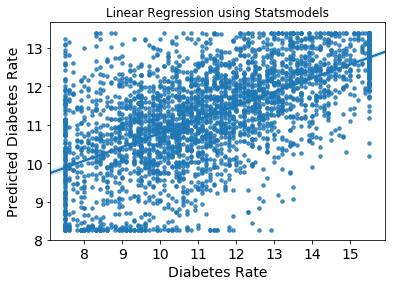

In [9]:
# Visualize fitted values by sm
sns.regplot(x=df.PCT_DIABETES_ADULTS13,y=m1.fittedvalues,scatter_kws={'s':12})
plt.xlabel('Diabetes Rate',fontsize=14)
plt.ylabel('Predicted Diabetes Rate',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Linear Regression using Statsmodels')
plt.show()

# The prediction is poor at the lowest and highest values

In [11]:
# Fit a linear regression model with sklearn, using all features (remove FIPS, state, county, and obesity)
from sklearn.linear_model import LinearRegression
m2 = LinearRegression()

In [12]:
X = df.iloc[:,5:-1] # Select features 
X = X.drop('PERPOV10',axis=1) # Drop the categorical variable 'persistant poverty counties'
y = df.PCT_DIABETES_ADULTS13 # Target variable

In [13]:
X.head()

,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,SODA_PRICE10,PCT_LOCLFARM12,GHVEG_FARMS12,PC_FSRSALES12,FMRKTPTH09,...,PC_FFRSALES12,FOODINSEC_10_12,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10
0,0.628059,56580.0,5.582238,0.073889,0.036945,0.972216,13.110540,0.0,512.280987,0.039404,...,674.80272,17.9,12.315055,18.824675,32.006749,0.018472,4.509008,0.674004,12.7,3.284786
1,1.125938,52387.0,3.403433,0.100331,0.117053,1.001391,10.414560,4.0,512.280987,0.022237,...,674.80272,17.9,12.315055,18.824675,33.216055,0.033444,4.509008,0.725055,12.9,2.147827
2,0.433887,32620.0,0.478663,0.036157,0.072314,0.992584,2.276708,0.0,512.280987,0.067256,...,674.80272,17.9,12.315055,18.824675,68.245839,0.000000,4.509008,1.280590,28.0,4.135869
3,0.261540,40767.0,0.883314,0.043590,0.000000,0.972216,6.878307,2.0,512.280987,0.046324,...,674.80272,17.9,12.315055,18.824675,50.278552,0.043590,4.509008,0.719122,22.2,3.458580
4,0.331351,50487.0,8.567571,0.052319,0.034879,0.972216,7.091056,0.0,512.280987,0.017139,...,674.80272,17.9,12.315055,18.824675,39.681098,0.017440,4.509008,0.657144,14.7,3.269380


In [14]:
X.shape

(3143, 29)

In [16]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

# Fit model with training data
m2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('R-squared of training data:',m2.score(X_train,y_train))

R-squared of training data: 0.6211213782090819


In [19]:
print('R-squared of test data:',m2.score(X_test,y_test))

R-squared of test data: 0.621781126175162


**Summary:** The R-squared of training data (0.621) is very close to testing data (0.622), so the model is unlikely to be overfitting.  
However, it is a bit unusual that the testing data resulted in slightly higher R-squared than training data. What could be underlying reasons?  
Could the model be underfitting?

In [18]:
# Get the coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': m2.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,FSRPTH09,-6.286096e-01
1,MEDHHINC15,-8.028903e-05
2,PC_DIRSALES12,-1.206240e-02
3,RECFACPTH09,-5.245828e-01
4,SPECSPTH09,-1.946707e+00
5,SODA_PRICE10,-2.187897e+00
6,PCT_LOCLFARM12,-1.738157e-03
7,GHVEG_FARMS12,-2.181945e-02
8,PC_FSRSALES12,-3.456127e-03
9,FMRKTPTH09,8.750880e-01


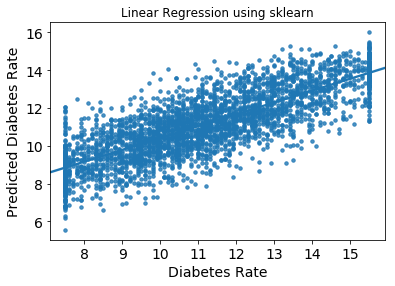

In [19]:
##### Visualize fitted values by sklearn
sns.regplot(x=df.PCT_DIABETES_ADULTS13,y=m2.predict(X),scatter_kws={'s':12})
plt.xlabel('Diabetes Rate',fontsize=14)
plt.ylabel('Predicted Diabetes Rate',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Linear Regression using sklearn')
plt.show()

In [10]:
# Check model assumptions
# 1) Fitted value vs. residuals plot
resid = y - m2.predict(X)
_ = sns.regplot(x=m2.predict(X),y=resid,fit_reg=False,scatter_kws={'s':12})
_ = plt.xlabel('Fitted values',fontsize=14)
_ = plt.ylabel('Residuals',fontsize=14)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)


NameError: name 'y' is not defined

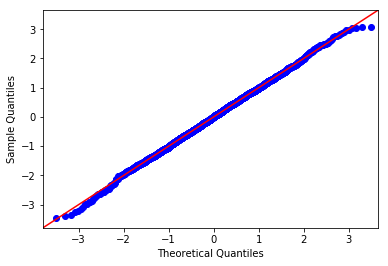

In [21]:
# 2): Quantile plot of the residuals
import scipy.stats as stats
fig = sm.qqplot(resid, stats.t, fit=True, line='45')

**Summary:**  1) Using two highly correlated features (medium household income and poverty rate) and statsmodels, we obtained a R-squared of 0.36  
2) Using all features and sklearn's LinearRegresson() regressor, we obtained a R-squared of 0.62 for both training and testing data sets.   

We will continue to use more complex models such as Decision Trees. 

### 2. Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [21]:
X = df.iloc[:,5:-1] # Select features. Retained the categorizal feature "persistant poverty county"
y = df.PCT_DIABETES_ADULTS13 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)


In [73]:
# First fit a decision tree with default parameters
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train,y_train)
print('Training data R-squared:',tree_default.score(X_train,y_train))
print('Testing data R-squared:',tree_default.score(X_test,y_test))

Training data R-squared: 1.0
Testing data R-squared: 0.36991524504858636


Model is overfitting. Next let us tune model parameters using GridSearchCV

In [90]:
#criterion = ['gini','entropy']
max_depth = [3,4,5]
min_samples_split = list(range(10,51,10))
min_samples_leaf = list(range(1,21,1))
max_features = [3,4,5,6,7,8,9,10,11,12]

parameters = {#'criterion':criterion,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features}

clf = GridSearchCV(tree,parameters)
clf.fit(X_train,y_train)

/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=21,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
   

In [91]:
# Print best parameters
print(clf.best_estimator_.get_params())

{'criterion': 'mse', 'max_depth': 5, 'max_features': 11, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 9, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 21, 'splitter': 'best'}


In [84]:
# Print cross-validation scores
print(cross_val_score(clf, X_train,y_train))

/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.54443461 0.5046851  0.54061117]


In [92]:
print('Training data R-squared:',clf.score(X_train,y_train))
print('Testing data R-squared:',clf.score(X_test,y_test))

Training data R-squared: 0.6104037768677517
Testing data R-squared: 0.5469344725829726


### Question
Model still a bit overfitting. Any other parameters worth tuning? 

In [100]:
tree_best = DecisionTreeRegressor(max_depth= 5, max_features=11,min_samples_leaf= 9, min_samples_split= 10,
                                 random_state=21)
tree_best.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=11,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=21, splitter='best')

In [101]:
from sklearn.tree import export_graphviz

export_graphviz(tree_best, out_file='tree_gridsearch.dot',
               feature_names = X.columns)



In [102]:
from subprocess import call

call(['dot', '-T', 'png', 'tree_gridsearch.dot', '-o', 'tree_gridsearch.png'])

0

<img src="tree.png">

Based on the tree, **medium household income (MEDHHINC15)** is the root node with most information gain. Followed by seven other features:  
     - PCT_SNAP12: SNAP-authorized stores/1000 pop 2012 
     - SODA_PRICES10: Price of sodas/national average 2010 
     - PC_FSRSALES12: Farms with direct sales (%) 2012 
     - PCT_FREE_LUNCH09: Students eligible for free lunch (%) 2009 
     - PCT_LACCESS_HHNV10: Households,no car & low access to store (%) 2010 
     - PTC_SBP09: School Breakfast Program participants (% pop), 2009
     - PCT_NSLP09: National school lunch program participants (% pop), 2009

However, we note that soda price (SODA_PRICES10) is a ratio and have small small variance. This might contribute to it being selected in the model. We will build the model without it.

In [29]:
df.describe()

,Unnamed: 0,FIPS,PCT_DIABETES_ADULTS13,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,SODA_PRICE10,PCT_LOCLFARM12,...,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,PERPOV10,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10,PCT_OBESE_ADULTS13
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,1571.000000,30390.411709,11.223293,0.734784,48166.822465,7.135911,0.072668,0.051489,0.990577,6.860307,...,11.132248,15.157662,40.970034,0.112313,0.014483,3.938442,0.869422,16.050120,2.947975,31.031851
std,907.450274,15164.717720,2.231687,0.352023,10376.471794,7.048415,0.061262,0.052887,0.048271,5.470817,...,1.850165,3.438042,14.243990,0.315801,0.017016,1.350278,0.316005,5.598152,1.769319,3.969074
min,0.000000,1001.000000,7.500000,0.224457,32620.000000,0.247672,0.000000,0.000000,0.930224,0.836820,...,7.990853,9.495621,18.061983,0.000000,0.000000,2.272469,0.401110,7.800000,0.676899,23.000000
25%,785.500000,18178.000000,9.500000,0.493836,40446.500000,1.846759,0.000000,0.000000,0.950234,2.832098,...,9.275093,12.566062,29.762637,0.000000,0.000000,2.818021,0.629603,11.500000,1.609832,28.300000
50%,1571.000000,29177.000000,11.100000,0.667858,46812.000000,4.950728,0.070302,0.043577,0.974821,5.093834,...,11.416674,15.223027,40.618802,0.000000,0.007298,3.294967,0.818400,15.200000,2.572299,31.200000
75%,2356.500000,45082.000000,12.900000,0.897423,54150.000000,9.088274,0.112864,0.083710,1.038527,9.159465,...,13.112031,18.353499,50.479574,0.000000,0.025621,5.427669,1.066786,19.700000,3.806324,33.800000
max,3142.000000,56045.000000,15.500000,1.605010,71896.000000,26.524685,0.201925,0.176991,1.102873,20.987654,...,13.551343,20.666612,69.509804,1.000000,0.053353,6.169233,1.561552,28.000000,7.258064,38.000000


In [30]:
X = df.iloc[:,5:-1] # Select features. Retained the categorizal feature "persistant poverty county"
X= X.drop('SODA_PRICE10',axis=1)
X= X.drop('MILK_SODA_PRICE10',axis=1)
y = df.PCT_DIABETES_ADULTS13 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)


In [31]:
tree_4 = DecisionTreeRegressor(max_depth=2)
tree_5 = DecisionTreeRegressor(max_depth=4)
tree_6 = DecisionTreeRegressor(max_depth=5)
tree_4.fit(X_train,y_train)
tree_5.fit(X_train,y_train)
tree_6.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [32]:
print('Training data R-squared for max-depth = 2: ',tree_4.score(X_train,y_train))
print('Training data R-squared for max-depth = 4: ',tree_5.score(X_train,y_train))
print('Training data R-squared for max-depth = 5: ',tree_6.score(X_train,y_train))

Training data R-squread for max-depth = 2:  0.4122660702386739
Training data R-squread for max-depth = 4:  0.5714251344889911
Training data R-squread for max-depth = 5:  0.633876105151852


In [33]:
print('Fitting data R-squared for max-depth = 2: ',tree_4.score(X_test,y_test))
print('Fitting data R-squared for max-depth = 4: ',tree_5.score(X_test,y_test))
print('Fitting data R-squared for max-depth = 5: ',tree_6.score(X_test,y_test))

Fitting data R-squread for max-depth = 2:  0.4152691273678295
Fitting data R-squread for max-depth = 4:  0.5505381337695896
Fitting data R-squread for max-depth = 5:  0.5760982868428517


In [34]:
from sklearn.tree import export_graphviz

export_graphviz(tree_5, out_file='tree2.dot',
               feature_names = X.columns)

call(['dot', '-T', 'png', 'tree2.dot', '-o', 'tree2.png'])

0

<img src="tree2.png">

In this model, two new features were selected: 
 - FOODINSEC_10_12: household food insecurity (%, three-year average 2010-12)
 - POVRATE15: Poverty rate, 2015
 
Removing soda price features did not significantly improve model fit. 

To be continued